<a href="https://colab.research.google.com/github/Tensorflow-Ranger/Audio-classification/blob/master/Music_Notes__Detection_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import librosa

In [ ]:
def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    print("Training sets loaded!",X.shape, y.shape)
    return X, y


def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):
    global X_test
    # load dataset
    X, y = load_data(data_path)

    # create train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    print(X_train[0])
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    print(X_train.shape,y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)
    return X_train, y_train, X_validation, y_validation, X_test, y_test


In [ ]:
DATA_PATH = "data.json"
SAVED_MODEL_PATH = "model.h5"
EPOCHS = 20
BATCH_SIZE = 2
PATIENCE = 5
LEARNING_RATE = 0.0001
loss= "sparse_categorical_crossentropy"
learning_rate=0.0001
input_shape = (44,128)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(52, activation='softmax'))

In [ ]:
optimiser = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimiser,loss=loss,metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 44, 64)            49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 52)                3380      
Total params: 89,972
Trainable params: 89,972
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)

    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history

In [ ]:
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()

Training sets loaded! (1972, 44, 128) (1972,)
[[-4.73627329 -4.16372108 -5.65888214 ... -8.48569584 -6.81394291
  -5.7616272 ]
 [-4.3183012  -3.95018125 -5.57784271 ... -8.39206314 -6.73754263
  -5.68552065]
 [-3.98428583 -3.60849142 -5.16337204 ... -8.38777065 -6.56696415
  -5.94253254]
 ...
 [-1.67411494  0.         -2.36426592 ... -8.31357002 -6.31994295
  -7.20808411]
 [-1.9201622   0.         -2.23395205 ... -7.97002363 -6.03449631
  -6.95099068]
 [-2.37156987  0.         -2.04031396 ... -7.71021938 -5.8138938
  -6.60633278]]
(1261, 44, 128) (1261,) (316, 44, 128) (316,) (395, 44, 128) (395,)
(1261, 44, 128) (1261,) (316, 44, 128) (316,) (395, 44, 128) (395,)
Epoch 1/20
631/631 [==============================] - 53s 84ms/step - loss: 0.5035 - accuracy: 0.8010 - val_loss: 0.5266 - val_accuracy: 0.8196
Epoch 2/20
631/631 [==============================] - 56s 88ms/step - loss: 0.2420 - accuracy: 0.9072 - val_loss: 0.1908 - val_accuracy: 0.9525
Epoch 3/20
631/631 [===================

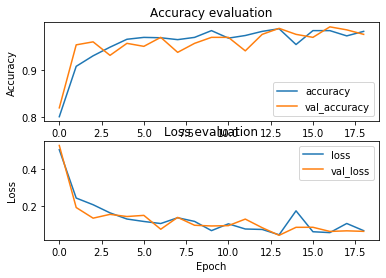

13/13 [==============================] - 0s 25ms/step - loss: 0.1269 - accuracy: 0.9646

Test loss: 0.12692373991012573, test accuracy: 96.45569324493408


In [ ]:
X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)
print(X_train.shape,y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

plot_history(history)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))
model.save(SAVED_MODEL_PATH)

In [ ]:
test_class = ["a","am","bm","dm","f","g"]
def predict(model,X,num):
    X = X[np.newaxis, ...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    predicted_index = (str(predicted_index)).replace("[","").replace("]","")
    print("Predicted: ",predicted_index)
    print("Actually: ",TestY[num])

In [ ]:
testX, TestY = load_data("test.json")
print(len(testX), len(TestY))
print(X_test[1].shape, testX[1].shape)

Training sets loaded! (17, 44, 128) (17,)
17 17
(44, 128) (44, 128)


In [ ]:
model.evaluate(testX,TestY)

1/1 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.7647


[0.45237135887145996, 0.7647058963775635]

In [ ]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add()

NameError: name 'Conv1D' is not defined